# 라이브러리 호출

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Data Load

In [79]:
df = pd.read_csv('/content/drive/MyDrive/kaggle loan data/loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [80]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# 결측치 처리

In [82]:
df_list = df.columns.to_list()

In [83]:
for i in df_list:
  a = df[i].isnull().sum()/len(df)*100
  print(f'{i} 결측치: {a} %')

Loan_ID 결측치: 0.0 %
Gender 결측치: 2.1172638436482085 %
Married 결측치: 0.4885993485342019 %
Dependents 결측치: 2.44299674267101 %
Education 결측치: 0.0 %
Self_Employed 결측치: 5.211726384364821 %
ApplicantIncome 결측치: 0.0 %
CoapplicantIncome 결측치: 0.0 %
LoanAmount 결측치: 3.5830618892508146 %
Loan_Amount_Term 결측치: 2.2801302931596092 %
Credit_History 결측치: 8.143322475570033 %
Property_Area 결측치: 0.0 %
Loan_Status 결측치: 0.0 %


In [84]:
df_nonnull = df[["Loan_ID", "Education", "ApplicantIncome", "CoapplicantIncome", "Property_Area", "Loan_Status"]]

In [85]:
df_null = df[["Gender", "Married", "Dependents", "Self_Employed", "LoanAmount", "Loan_Amount_Term", "Credit_History"]]
df_null.head()

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0,No,NaN,360.0,1.0
1,Male,Yes,1,No,128.0,360.0,1.0
2,Male,Yes,0,Yes,66.0,360.0,1.0
3,Male,Yes,0,No,120.0,360.0,1.0
4,Male,No,0,No,141.0,360.0,1.0


In [86]:
# 데이터는 pandas df 형태이다.

# 변환 전 데이터 확인
df_null.head(10)

#변환
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='most_frequent') #'median'을 쓰면 중앙값사용
imp_mean.fit(df_null)
df_imputed = pd.DataFrame(imp_mean.transform(df_null))

# 변환 후 데이터 확인
df_imputed.head(10)

,0,1,2,3,4,5,6
0,Male,No,0,No,120.0,360.0,1.0
1,Male,Yes,1,No,128.0,360.0,1.0
2,Male,Yes,0,Yes,66.0,360.0,1.0
3,Male,Yes,0,No,120.0,360.0,1.0
4,Male,No,0,No,141.0,360.0,1.0
5,Male,Yes,2,Yes,267.0,360.0,1.0
6,Male,Yes,0,No,95.0,360.0,1.0
7,Male,Yes,3+,No,158.0,360.0,0.0
8,Male,Yes,2,No,168.0,360.0,1.0
9,Male,Yes,1,No,349.0,360.0,1.0


In [87]:
df_list1 = df_imputed.columns.to_list()

In [88]:
df_imputed.columns = ["Gender", "Married", "Dependents", "Self_Employed", "LoanAmount", "Loan_Amount_Term", "Credit_History"]
df_imputed

,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,0,No,120.0,360.0,1.0
1,Male,Yes,1,No,128.0,360.0,1.0
2,Male,Yes,0,Yes,66.0,360.0,1.0
3,Male,Yes,0,No,120.0,360.0,1.0
4,Male,No,0,No,141.0,360.0,1.0
...,...,...,...,...,...,...,...
609,Female,No,0,No,71.0,360.0,1.0
610,Male,Yes,3+,No,40.0,180.0,1.0
611,Male,Yes,1,No,253.0,360.0,1.0
612,Male,Yes,2,No,187.0,360.0,1.0


In [89]:
for i in df_imputed:
  a = df_imputed[i].isnull().sum()/len(df_imputed)*100
  print(f'{i} 결측치: {a} %')

Gender 결측치: 0.0 %
Married 결측치: 0.0 %
Dependents 결측치: 0.0 %
Self_Employed 결측치: 0.0 %
LoanAmount 결측치: 0.0 %
Loan_Amount_Term 결측치: 0.0 %
Credit_History 결측치: 0.0 %


In [90]:
df_dropm = pd.concat([df_nonnull,df_imputed], axis=1)
df_dropm

,Loan_ID,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Loan_Status,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001002,Graduate,5849,0.0,Urban,Y,Male,No,0,No,120.0,360.0,1.0
1,LP001003,Graduate,4583,1508.0,Rural,N,Male,Yes,1,No,128.0,360.0,1.0
2,LP001005,Graduate,3000,0.0,Urban,Y,Male,Yes,0,Yes,66.0,360.0,1.0
3,LP001006,Not Graduate,2583,2358.0,Urban,Y,Male,Yes,0,No,120.0,360.0,1.0
4,LP001008,Graduate,6000,0.0,Urban,Y,Male,No,0,No,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Graduate,2900,0.0,Rural,Y,Female,No,0,No,71.0,360.0,1.0
610,LP002979,Graduate,4106,0.0,Rural,Y,Male,Yes,3+,No,40.0,180.0,1.0
611,LP002983,Graduate,8072,240.0,Urban,Y,Male,Yes,1,No,253.0,360.0,1.0
612,LP002984,Graduate,7583,0.0,Urban,Y,Male,Yes,2,No,187.0,360.0,1.0


# Data scailing

In [91]:
categorical_features = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]
numerical_features = [i for i in df_dropm.columns if i not in categorical_features]

In [92]:
all_X = df_dropm.drop(['Loan_ID', 'Loan_Status'], axis = 1)
all_y = df_dropm['Loan_Status']

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=0.2, random_state=42, stratify=all_y)

In [93]:
def get_values(value):
    return value.values.reshape(-1, 1)

for col in train_X.columns:
    if col not in categorical_features:
        scaler = StandardScaler()
        train_X[col] = scaler.fit_transform(get_values(train_X[col]))
        test_X[col] = scaler.transform(get_values(test_X[col]))
            
le = LabelEncoder()
for col in categorical_features:    
    train_X[col] = le.fit_transform(train_X[col])
    test_X[col] = le.transform(test_X[col])

In [94]:
train_X

,Education,ApplicantIncome,CoapplicantIncome,Property_Area,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History
154,0,-0.352802,-0.563228,2,1,0,0,0,-1.126641,0.280691,0.397516
239,0,-0.343346,-0.563228,1,1,1,1,0,-0.587901,0.280691,0.397516
448,0,-0.339471,0.050405,0,1,1,2,0,0.044533,0.280691,-2.515623
471,1,-0.445963,-0.024953,0,1,1,1,0,-0.388801,-2.486768,-2.515623
273,0,-0.451078,0.234495,1,1,1,0,0,0.044533,0.280691,0.397516
...,...,...,...,...,...,...,...,...,...,...,...
222,0,-0.396670,0.438322,1,1,0,0,0,-0.025737,0.280691,0.397516
349,0,-0.450303,1.679583,0,1,1,0,0,0.477868,0.280691,0.397516
26,0,-0.423331,0.245260,1,1,1,0,0,-0.283395,0.280691,0.397516
96,0,-0.472160,0.262844,1,0,1,0,0,-0.107719,0.280691,0.397516


In [95]:
from sklearn.linear_model import LogisticRegression # 먼저 로지스틱 회귀를 이용해 다중분류를 진행해 본다.
lr = LogisticRegression()
lr.fit(train_X, train_y)
print(lr.score(train_X, train_y))
print(lr.score(test_X, test_y))

0.7983706720977597
0.8617886178861789


In [96]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(train_X, train_y)
print(dt.score(train_X, train_y))
print(dt.score(test_X, test_y))

0.824847250509165
0.8211382113821138


In [97]:
from sklearn.metrics import f1_score
dt_pred = dt.predict((test_X))

In [106]:
from sklearn.metrics import classification_report

print(classification_report(test_y ,dt_pred))

              precision    recall  f1-score   support

           N       0.81      0.55      0.66        38
           Y       0.82      0.94      0.88        85

    accuracy                           0.82       123
   macro avg       0.82      0.75      0.77       123
weighted avg       0.82      0.82      0.81       123



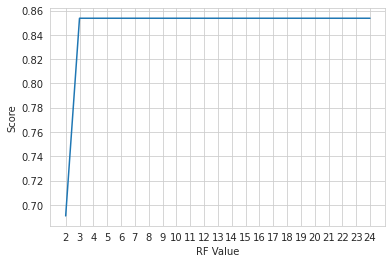

Random Forest Accuracy:  85.37%


In [107]:
from sklearn.ensemble import RandomForestClassifier
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(train_X, train_y)
    scoreListRF.append(RFclassifier.score(test_X, test_y))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))